## Coin toss random walk
In a time period of length $T$, we're gonna throw $T$ coin tosses at a constant rate, so we're gonna throw 1 coin toss per unit time. The bet is $1 on each coin toss (if heads, we add $1 to our account, and if tails, we subtract it). The array $X$ represents our account, where $X_i$ is the amount of money in our account (could be negative) after the $i^{th}$ toss. We start with $X_0 = 0$.

What is the variance of the net money won after each toss? That is:
$$
\frac{1^2 + (-1)^2}{2} = 1
$$
Since the variance of the sum of independent RVs is the sum of the variance of those RVs, the variance of the account after $T$ tosses is $T$.<br><br><br>

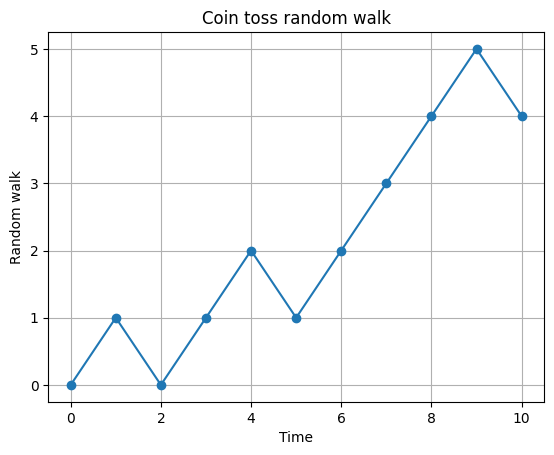

In [11]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt

### Parameters
T = 10 # Time period of interest
t = 1 # Time per toss

### Body
N = math.floor(T / t)
X = np.zeros(N + 1) # Initialize the random walk
for i in range(1, N + 1):
    deltaX = random.choice([-1, 1]) # Take the random steps
    X[i] = X[i - 1] + deltaX

# Plot the walk
plt.plot(t * np.arange(N + 1), X, marker = "o")
plt.xlabel("Time")
plt.ylabel("Random walk")
plt.title("Coin toss random walk")
plt.grid(True)
plt.show() 

Now let's modify the bet, and the pace of the tosses. In a time period $T$, we're gonna trow $N$ coin tosses, at a pace of $\frac{T}{N}$ per coin toss. We're gonna be betting \$ $\sqrt{\frac{T}{N}}$ on each coin toss.

What is the variance of the net money won after each toss? That is:
$$
\frac{\sqrt{\frac{T}{N}}^2 + \left(-\sqrt{\frac{T}{N}}\right)^2}{2} = \frac{\frac{T}{N} + \frac{T}{N}}{2} = \frac{T}{N}
$$
Again, this coincides with the amount ot time taken to throw those tosses, and so does the variance after $N$ tosses: $N\frac{T}{N} = T$.

The random walk $X$ has two very important properties: the Markov property and the Martingale property.<br><br><br>

#### Markov property:
The random variable $X_i$ conditional upon all of the past values of $X$ $\left(X_j \text{ for all } j<i\right)$ only depends on the previous value $X_{i-1}$, or the latest known value if $X_{i-1}$ isn't known.

For example, if I know the value of $X_j$ for $j = 0, 1, 2, 3, 4$, then $X_5$ is a random variable only dependent on $X_4$, $X_j$ for $j = 0, 1, 2, 3$ is irrelevant. But also, $X_8$ only depends on $X_4$ too, since it's the latest known value (we don't know $X_j$ for $j = 5, 6, 7$).

Remember, each step $X_i - X_{i-1}$ is a random variable which could be $\sqrt{\frac{T}{N}}$ or $-\sqrt{\frac{T}{N}}$, both with probability $0.5$.<br><br>

#### Martingale property
The conditional expectation of your winnings at any time in the future is just the amount you already hold. More precisely, if $X_i$ is the last value of the random walk $X$ you know, then the expected value of $X_j$ for all $j>i$ is $X_i$.

For example, suppose again we know $X_i$ for $i=0, 1, 2, 3, 4$. Then the expected value of both $X_5$ and $X_8$ is $X_4$. In fact, the expected value of $X_i$ for all $i>4$ is $X_4$.<br><br><br>

The following code simulates a coin toss random walk from time $0$ to time $T$. Modify the parameters $T$ and $N$ as you like, experiment with it.

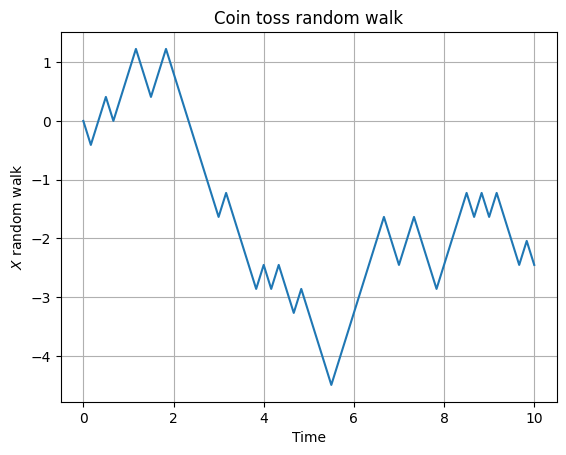

0.28577380332470415
8.033333333333324


In [3]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt

### Parameters
T = 10 # Time period of interest
N = 60 # Number of tosses in T

### Body
bet = math.sqrt(T / N)

X = np.zeros(N + 1) # Initialize the random walk
for i in range(1, N + 1):
    deltaX = random.choice([-bet, bet]) # Take the random steps
    X[i] = X[i - 1] + deltaX

# Plot the walk
plt.plot(np.arange(N + 1) * T / N, X)
plt.xlabel("Time")
plt.ylabel("$X$ random walk")
plt.title("Coin toss random walk")
plt.grid(True)
plt.show() 


datapoints = np.zeros(100)
for j in range(100):
    
    bet = math.sqrt(T / N)

    X = np.zeros(N + 1) # Initialize the random walk
    for i in range(1, N + 1):
        deltaX = random.choice([-bet, bet]) # Take the random steps
        X[i] = X[i - 1] + deltaX
    datapoints[j] = X[-1]
    
mean = sum(datapoints) / len(datapoints)

variance = sum(datapoints ** 2) / len(datapoints)
print(mean)
print(variance)


Observe, after running many simulations and noting the value of $W_N$ (the end of the random walk), that the variance of $W_N$ is, roughly by eye, $T$, and its expected value 0. You may even modify the code to run many simulations and calculate both metrics. You may do so for any $W_i$, and observe that its variance is $i\frac{T}{N}$, and expected value 0.<br><br><br><br>

## Brownian motion/Wiener process
Now let us code the Brownian motion/Wiener process (we'll use both names). The Wiener process is not a step-based random walk, but a continuous time-dependent walk, $W(t)$. It is the limit of the coin toss random walk when $N$ tends to infinity. Thus, using an identical code but with a very high $N$ would yield a very good approximation. However, it is not quite the same. In a Wiener process, any increment, $W(t + dt) - W(t)$, is a normally distributed random variable with expected value $0$ and variance equal to the time step $dt$.

Mathematically, this is because there are infinite coin tosses happening between any increment, all with a very, very small bet. By the Central Limit Theorem, the sum of an arbirarily large number of identically distributed random variables converges to a normally distributed random variable.

<img src="normal_distribution.webp" alt="Alt text" width="500"/>


Hence, the only difference in the code is we must generate a normally distributed RV for the increment, not choose between adding or subtracting the bet.

As you can probably deduce, a Wiener process conserves the Markov property (future values only depend on $W(t)$ for the latest $t$ known) and the Martingale property (the expected value of any future value is equal to $W(t)$ for the latest $t$ known).

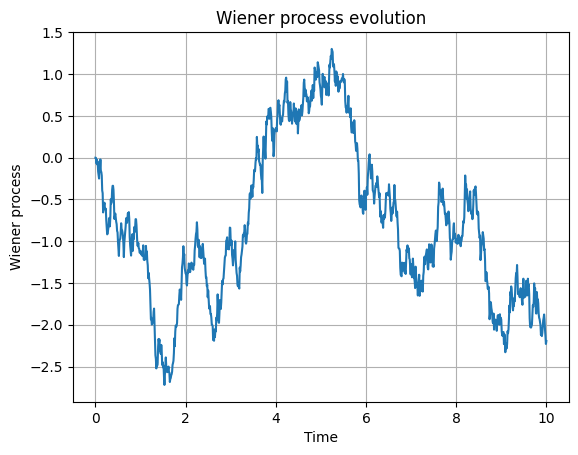

-0.07800000000000001
11.024399999999982


In [4]:
### Parameters
T = 10 # Time period of interest
dt = 1/100 # Time step

### Body
N = round(T / dt) # Number of steps in the approximation

W = np.zeros(N + 1) # Initialize the random walk
for i in range(1, N + 1):
    dW = np.random.normal(scale = math.sqrt(dt)) # scale= is the standard deviation, or the square root of the variance.
    W[i] = W[i - 1] + dW

# Plot the Wiener process
plt.plot(np.arange(N + 1) * dt, W)
plt.xlabel("Time")
plt.ylabel("Wiener process")
plt.title("Wiener process evolution")
plt.grid(True)
plt.show()

datapoints = np.zeros(100)
for j in range(100):
    
    bet = math.sqrt(T / N)

    W = np.zeros(N + 1) # Initialize the random walk
    for i in range(1, N + 1):
        deltaW = random.choice([-bet, bet]) # Take the random steps
        W[i] = W[i - 1] + deltaW
    datapoints[j] = W[-1]
    
mean = sum(datapoints) / len(datapoints)

variance = sum(datapoints ** 2) / len(datapoints)
print(mean)
print(variance)

Even though a Brownian motion is continuous, and in Python we can't do anything else but use discrete time steps, this code doesn't create an approximation of a Brownian motion, it is exactly a Brownian motion (with the only disadvantage that we only have the value at discrete $t$, but they have no error), thanks to the use of normally distributed increments.
<br><br><br><br>



## Geometric Brownian Motion
The next kind of variable that we will look at is the Geometric Brownian Motion (GBM). A Geometric Brownian Motion, S(t), satisfies the GBM stochastic differentianl equation (SDE):
$$
dS(t) = \mu S(t)\cdot dt + \sigma S(t)\cdot dW(t)
$$
where $\mu$, called drift, and $\sigma$, called volatility, are both constant. $W(t)$ is a Brownian motion, so $dW(t)=W(t + dt) - W(t)$  is a normally distributed RV with variance $dt$. A GBM can have any initial value. Of course, if it's $0$, it will stay $0$ forever, which is not interesting. Let us program an approximation to a Geometric Brownian Motion with finite differences for very small time steps.

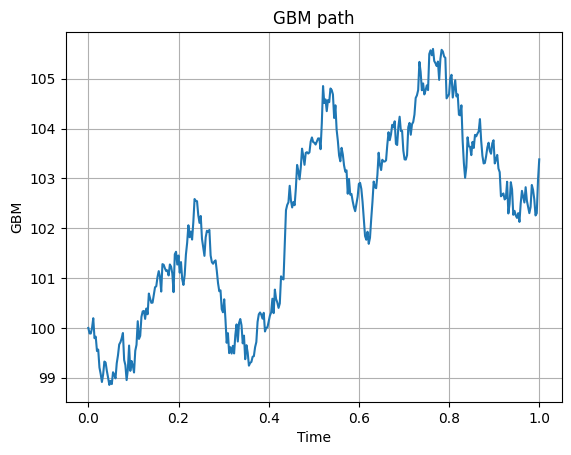

In [18]:
### Parameters
S = 100 # Initial value of stock, in $
mu = 0.05 # Drift, in years^(-1)
sigma = 0.05 # Volatility, in years^(-1/2)
dt = 1/365 # Time step, in years
T = 1 # Time period of interest, in years

### Body
N = round(T / dt) # Total time steps
time = np.arange(N + 1) * dt # time-axis for the plot

S_motion = np.zeros(N + 1) # Initialize the array with stock values
S_motion[0] = S # Current value
for i in range(N):
    dW = np.random.normal(scale = math.sqrt(dt))
    dS = mu * S_motion[i] * dt + sigma * S_motion[i] * dW # Geometric Brownian Motion differential equation
    S_motion[i + 1] = S_motion[i] + dS

# Plot the stock
plt.plot(time, S_motion)
plt.xlabel("Time")
plt.ylabel("GBM")
plt.title("GBM path")
plt.grid(True)
plt.show()

The GBM is the most widely accepted model for equities, commodities, indices... This is because it is simple enough to both callibrate and interpret very easily, while also modelling the behaviour of an equity reasonably well. Note, however, that by no means is it the most accurate one in modelling this behaviour, nor is it out of the models that we will be using this semester. Realize, for example, that in the real world, should stocks follow a similarly shaped equation as the GBM (which is not necessarily true), the drift and volatility can't be constant.

The GBM stochastic differential equation turns out to have a solution. It is solved using Ito's Lemma, the main tool for stochastic calculus. You can't solve SDEs with the same tools as for non-stochastic DEs, naturally, because a Wiener process doesn't behave like a normal variable (for example, it is not differentiable). The solution is the following:
$$
S(t) = S_0e^{(\mu - \frac{1}{2}\sigma^2)t + \sigma W(t)}
$$
$S_0$ is the initial value of the GBM, $S(0)$. For a GBM, using the SDE to calculate finite increments doesn't yield the exact solution, but an approximation. The following code plots the finite difference approximation as well as the exact solution, both using the same Wiener process (first plot). The last plot shows their difference. Smaller time steps lead to smaller error, naturally. You may play with the inputs ("mu" or "sigma" will affect the behaviour of the GBM, and "dt" affects the quality of the finite difference approximation) for better understanding.

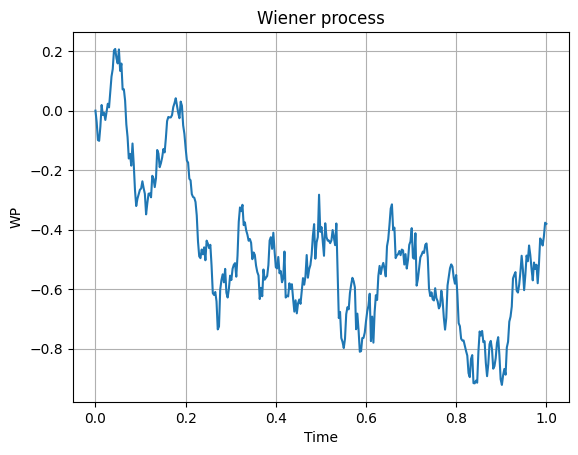

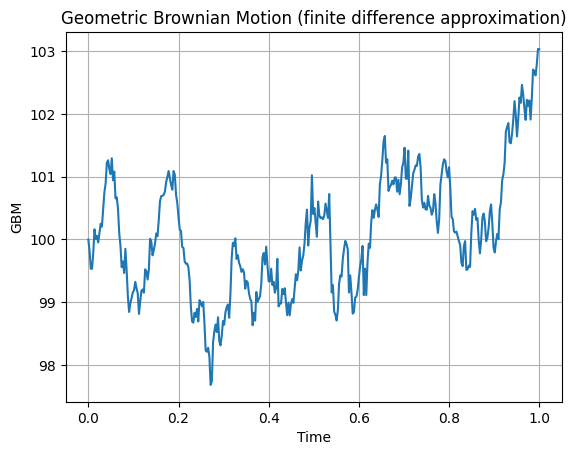

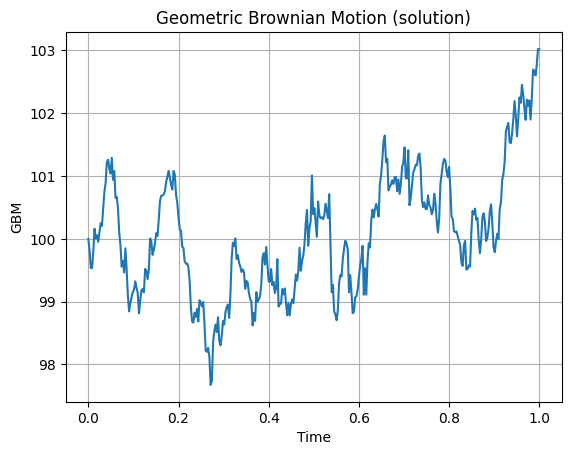

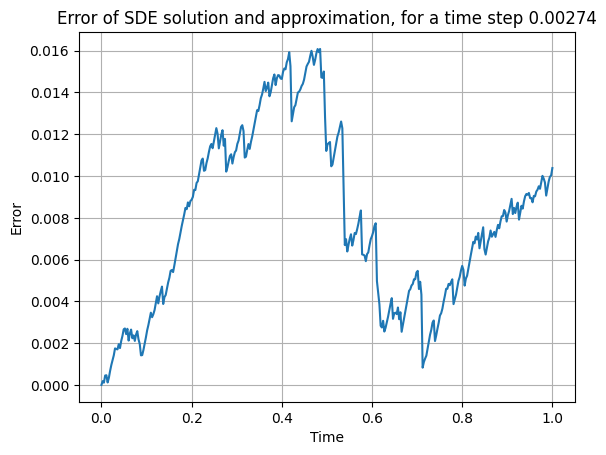

In [19]:
### Parameters
S = 100 # Initial value of stock, in $
mu = 0.05 # Drift, in years^(-1)
sigma = 0.05 # Volatility, in years^(-1/2)
dt = 1/365 # Time step, in years
T = 1 # Time period of interest, in years

### Body
N = round(T / dt) # Total time steps
time = np.arange(N + 1) * dt # time-axis for the plot

S_motion = np.zeros(N + 1) # Initialize the array with stock values
W = np.zeros(N + 1) # Initialize Wiener process
S_motion[0] = S # Current value
for i in range(N):
    dW = np.random.normal(scale = math.sqrt(dt))
    dS = S_motion[i] * (mu * dt + sigma * dW) # Geometric Brownian Motion differential equation
    S_motion[i + 1] = S_motion[i] + dS
    W[i + 1] = W[i] + dW

# Plot the Wiener process
plt.plot(time, W)
plt.xlabel("Time")
plt.ylabel("WP")
plt.title("Wiener process")
plt.grid(True)
plt.show() 

# Plot the GBM
plt.plot(time, S_motion)
plt.xlabel("Time")
plt.ylabel("GBM")
plt.title("Geometric Brownian Motion (finite difference approximation)")
plt.grid(True)
plt.show() 

# Check that the GBM SDE analytical solution is correct
sol_S_motion = S * np.exp((mu - sigma ** 2 / 2) * time + sigma * W) # Mathematical solution, note "time" and "W" are both np arrays of length N + 1
# Observe similar or almost identical shape
plt.plot(time, sol_S_motion)
plt.xlabel("Time")
plt.ylabel("GBM")
plt.title("Geometric Brownian Motion (solution)")
plt.grid(True)
plt.show()

# Plot difference/error, observe very low numbers
plt.plot(time, S_motion - sol_S_motion)
plt.xlabel("Time")
plt.ylabel("Error")
plt.title(f'Error of SDE solution and approximation, for a time step {format(dt, ".3g")}')
plt.grid(True)
plt.show()

## Calibrating parameters (drift and volatility)

Whenever we want to use the Geometric Brownian Motion model to simulate a random path (or many) of an equity, the drift and volatility have to be correctly callibrated. Different equities might have different and drifts volatilities. In this section we will explain how to callibrate these for a given equity. The following text will reference the code bellow a lot, so text and code are both meant to be read "at the same time", jumping from one to the other.

First, manipulate the GBM SDE in the following way:

$$
\frac{dS(t)}{S(t)} = \mu dt + \sigma dW(t)
$$

Given the time series of a stock between two different points in time, we can easily compute the percentage returns after each day, as shown in step 1.4 in the code. Now, observe that $\frac{dS}{S}$ is just $(S(t+dt) - S(t)) / S(t) = \frac{S(t+dt)}{S(t)} - 1$, when $dt$ is infinitesimally small. This is the same formula we use to calculate the percentage returns each day, except there we use a finite $dt$ of $\frac{1}{252}$ years (a year has 252 financial days, not 365, due to weekends and holidays).  
Assuming that the stock was following a Geometric Brownian Motion for which we don't know $\mu$ and $\sigma$ yet, this means that each entry in our "returns" array is just a realization/outcome of the random variable $\frac{dS(t)}{S(t)}$. This RV is identically distributed all the time, since it is equal to $\mu dt + \sigma dW(t)$, all constants ($\mu$, $\sigma$, $dt$) or identically distributed random variables ($dW(t)$).
Hence, calculating the mean and standard deviation of the entries of our "returns" array is an approximation of the expected value and standard deviation, respectively, of the random variable $\frac{dS(t)}{S(t)}=\mu dt + \sigma dW(t)$.

Let us derive the expected value and standard deviation of this RV:  
Since $dW(t)$ has expected value 0 and $\sigma$ is constant, then $\mathbb{E}[\sigma dW(t)] = 0$, so $\mathbb{E}[\mu dt + \sigma dW(t)] = \mathbb{E}[\mu dt]$. Since $\mu$ and $dt$ are constants, $\mathbb{E}[\mu dt] = \mu dt$.  
We conclude $\mathbb{E}\left[\frac{dS(t)}{S(t)}\right] = \mu dt$. Now let's find the standard deviation.

Since $\mu dt$ is a constant, the standard deviation of $\mu dt + \sigma dW(t)$ is the same as the standard deviation of $\sigma dW(t)$. Since $\sigma$ is a constant, that is the same as $\sigma$ times the standard deviation of $dW(t)$, which is $\sqrt{dt}$, as we know.  
We conclude that the standard deviation of $\frac{dS(t)}{S(t)}$ is $\sigma \sqrt{dt}$.

We can now very easily calculate what $\mu$ an $\sigma$ have been for the stock during period for which we have the time series. Again, this is assuming that the stock was behaving like a GBM, so with constant drift and volatility, and the real behaviour of the stock might not be governed by that. Say we calculate with our code a mean of the daily returns $m$ and a standard deviation $s$. Then:
$$
\mu = \frac{m}{dt}
$$
$$
\sigma = \frac{s}{\sqrt{dt}}
$$
Typically $dt = \frac{1}{252}$.

C:\Users\Umbi Pumbi\AppData\Local\Temp\ipykernel_15792\4285554057.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  msft = yf.download(ticker, start="2020-01-01", end="2025-10-01")
[*********************100%***********************]  1 of 1 completed

Data frame as downloaded from yfinance:
Price            Close        High         Low        Open    Volume
Ticker            MSFT        MSFT        MSFT        MSFT      MSFT
Date                                                                
2020-01-02  152.791107  152.895746  150.612732  151.040795  22622100
2020-01-03  150.888596  152.153771  150.355893  150.603230  21116200
2020-01-06  151.278625  151.345221  148.881450  149.423674  20813700
2020-01-07  149.899307  151.887434  149.651985  151.554502  21634100
2020-01-08  152.286972  152.962372  150.251279  151.183509  27746500
...                ...         ...         ...         ...       ...
2025-09-24  510.149994  512.479980  506.920013  510.380005  13533700
2025-09-25  507.029999  510.010010  505.040009  508.299988  15786500
2025-09-26  511.459991  513.940002  506.619995  510.059998  16213100
2025-09-29  514.599976  516.849976  508.880005  511.500000  17617800
2025-09-30  517.950012  518.159973  509.660004  513.239990  197

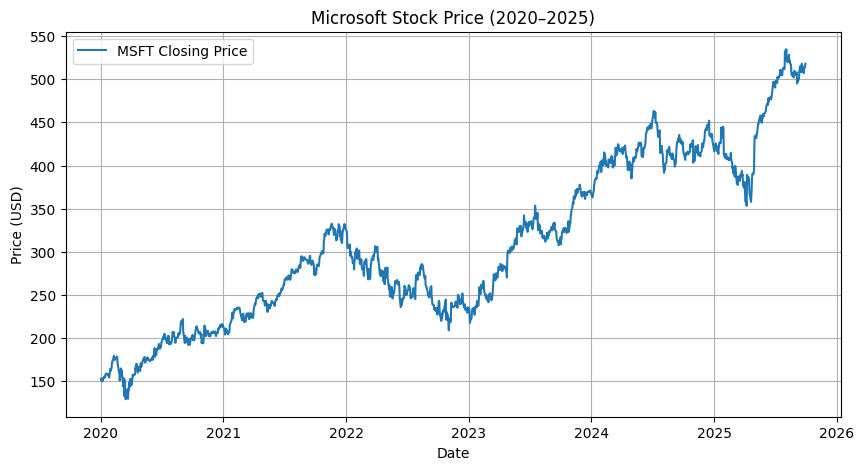

Daily returns:
[-0.01245172  0.00258489 -0.00911773 ...  0.00873714  0.00613926
  0.00650998]


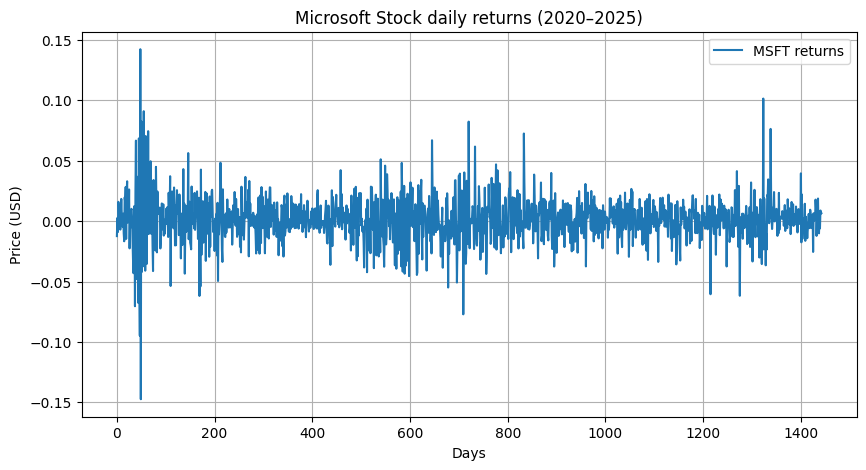

Drift: 0.2580281883550941
Volatility: 0.005639930924451482


In [20]:
import yfinance as yf
import matplotlib.pyplot as plt

### PART 1: OBTAIN AND MANIPULATE THE HISTORICAL TIME SERIES

# 1.1 Define the ticker symbol for the desired equity
ticker = "MSFT"     # Take Microsoft, for example

# 1.2 Download historical data
# You can specify the period (e.g. '1y', '5y', 'max') or a start/end date
msft = yf.download(ticker, start="2020-01-01", end="2025-10-01")
print("Data frame as downloaded from yfinance:")
print(msft)

# 1.3 Take the closing price of the stock after each day, and turn it to a numpy array for easy manipulation
msft_np = msft['Close'].to_numpy().T[0]
print("MSFT price Numpy array:")
print(msft_np)
# Plot the closing price over time if you're interested
plt.figure(figsize=(10, 5))
plt.plot(msft['Close'], label='MSFT Closing Price')
plt.title('Microsoft Stock Price (2020–2025)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# 1.4 Compute the percentage returns after each day: (today's_closing_price / yesterday's_closing_price) - 1
returns = np.array([msft_np[i + 1] / msft_np[i] - 1 for i in range(len(msft_np) - 1)])
N = len(returns)
print("Daily returns:")
print(returns)
# Plot the daily returns over time if you're interested
plt.figure(figsize=(10, 5))
plt.plot(returns, label='MSFT returns')
plt.title('Microsoft Stock daily returns (2020–2025)')
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()



### PART 2: CALLIBRATE THE DRIFT

# 2.1 Calculate the mean of the returns
mean = sum(returns) / N

# 2.2 Hence, calculate the drift
dt = 1/252
drift = mean / dt
print(f'Drift: {drift}')



### PART 3: CALLIBRATE THE VOLATILITY

# 3.1 Calculate the standard deviation of the returns
std = sum(returns ** 2) / N - (sum(returns) / N) ** 2

# 3.2 Hence, calculate the volatility
volatility = std / math.sqrt(dt)
print(f'Volatility: {volatility}')